In [1]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()

# Extract data and species
iris_data = iris.data
iris_species = iris.target

print("iris_data:\n", iris_data[0:10])
print("iris_species:\n", iris_species)

iris_data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
iris_species:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# Normalize data
scaler = StandardScaler()
iris_data_normalized = scaler.fit_transform(iris_data)

In [4]:
# Set up StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=50)

In [5]:
# Run Knn on Iris data set
k_accuracy_list = []

# Run Knn for k values 1 through 20
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracy_list = []

    # Run Knn for each fold
    for train_index, test_index in kf.split(iris_data_normalized, iris_species):
        training_data, testing_data = iris_data_normalized[train_index], iris_data_normalized[test_index]
        training_species, testing_species = iris_species[train_index], iris_species[test_index]

        # Train model
        knn.fit(training_data, training_species)

        # Test model on test data
        predicted_species = knn.predict(testing_data)

        # Compare predicted species to test species
        fold_accuracy = accuracy_score(testing_species, predicted_species)
        fold_accuracy_list.append(fold_accuracy)

    # Compute average accuracy for k
    k_accuracy = np.mean(fold_accuracy_list)
    k_accuracy_list.append(k_accuracy)

    print("Mean accuracy for k=", k, ": ", f"{k_accuracy:.4f}")

Mean accuracy for k= 1 :  0.9467
Mean accuracy for k= 2 :  0.9533
Mean accuracy for k= 3 :  0.9467
Mean accuracy for k= 4 :  0.9400
Mean accuracy for k= 5 :  0.9467
Mean accuracy for k= 6 :  0.9533
Mean accuracy for k= 7 :  0.9600
Mean accuracy for k= 8 :  0.9533
Mean accuracy for k= 9 :  0.9533
Mean accuracy for k= 10 :  0.9533
Mean accuracy for k= 11 :  0.9533
Mean accuracy for k= 12 :  0.9533
Mean accuracy for k= 13 :  0.9667
Mean accuracy for k= 14 :  0.9667
Mean accuracy for k= 15 :  0.9667
Mean accuracy for k= 16 :  0.9733
Mean accuracy for k= 17 :  0.9667
Mean accuracy for k= 18 :  0.9667
Mean accuracy for k= 19 :  0.9533
Mean accuracy for k= 20 :  0.9600


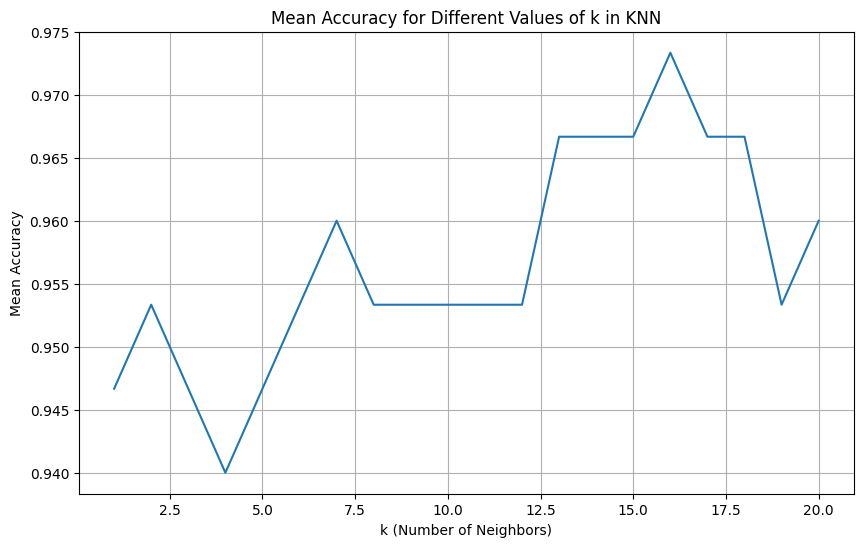

In [8]:
# Visualize results
x_axis = range(1,21)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, k_accuracy_list)
plt.title('Mean Accuracy for Different Values of k in KNN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()